In [259]:
# Davis Hanai, Quynh-Tram Tran, Michael Cali, and Wynter Gray (Final Project Part 1 - Data Wrangling) 

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

In [262]:
# Fetch dataset with ID 336 (CKD)
chronic_kidney_disease = fetch_ucirepo(id=336)

In [263]:
# Extract features and targets
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

In [264]:
# Optional: View metadata
print(chronic_kidney_disease.metadata)
print(chronic_kidney_disease.variables)

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [265]:
df_ckd = pd.concat([X, y], axis=1)

In [266]:
# Predictor variable 'class' not missing any values
df_ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [267]:
#Introduce Train and Test Sets

In [268]:
# Splitting the dataset into 80% training set and 20% test set

from sklearn.model_selection import train_test_split

In [269]:
# Separate features and target
X = df_ckd.drop('class', axis=1)
y = df_ckd['class']

In [270]:
# Reproducible train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Keeps CKD distribution balanced
)
df_ckd_train = pd.concat([X_train, y_train], axis=1)

In [271]:
df_ckd_train.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
380,59.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,113.0,...,54.0,6500.0,4.9,no,no,no,good,no,no,notckd
228,60.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,124.0,...,NaN,NaN,NaN,yes,no,no,good,no,no,ckd
85,70.0,70.0,1.015,2.0,NaN,NaN,NaN,notpresent,notpresent,NaN,...,NaN,NaN,NaN,no,yes,no,poor,yes,no,ckd
371,28.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,79.0,...,51.0,6500.0,5.0,no,no,no,good,no,no,notckd
333,23.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,99.0,...,46.0,4300.0,5.5,no,no,no,good,no,no,notckd


In [272]:
df_ckd_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 380 to 60
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     313 non-null    float64
 1   bp      312 non-null    float64
 2   sg      280 non-null    float64
 3   al      281 non-null    float64
 4   su      278 non-null    float64
 5   rbc     196 non-null    object 
 6   pc      267 non-null    object 
 7   pcc     316 non-null    object 
 8   ba      316 non-null    object 
 9   bgr     288 non-null    float64
 10  bu      307 non-null    float64
 11  sc      308 non-null    float64
 12  sod     255 non-null    float64
 13  pot     255 non-null    float64
 14  hemo    279 non-null    float64
 15  pcv     267 non-null    float64
 16  wbcc    238 non-null    float64
 17  rbcc    218 non-null    float64
 18  htn     320 non-null    object 
 19  dm      320 non-null    object 
 20  cad     320 non-null    object 
 21  appet   319 non-null    object 
 22  pe    

In [273]:
# Count missing values: rbc, rbcc, and wbcc are missing a lot of data points.

missing_counts = df_ckd_train.isnull().sum()
missing_percent = (missing_counts / len(df_ckd_train)) * 100

missing_summary = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_percent': missing_percent.round(2)
}).sort_values(by='missing_percent', ascending=False)

missing_summary

,missing_count,missing_percent
rbc,124,38.75
rbcc,102,31.87
wbcc,82,25.62
sod,65,20.31
pot,65,20.31
pc,53,16.56
pcv,53,16.56
su,42,13.12
hemo,41,12.81
sg,40,12.50


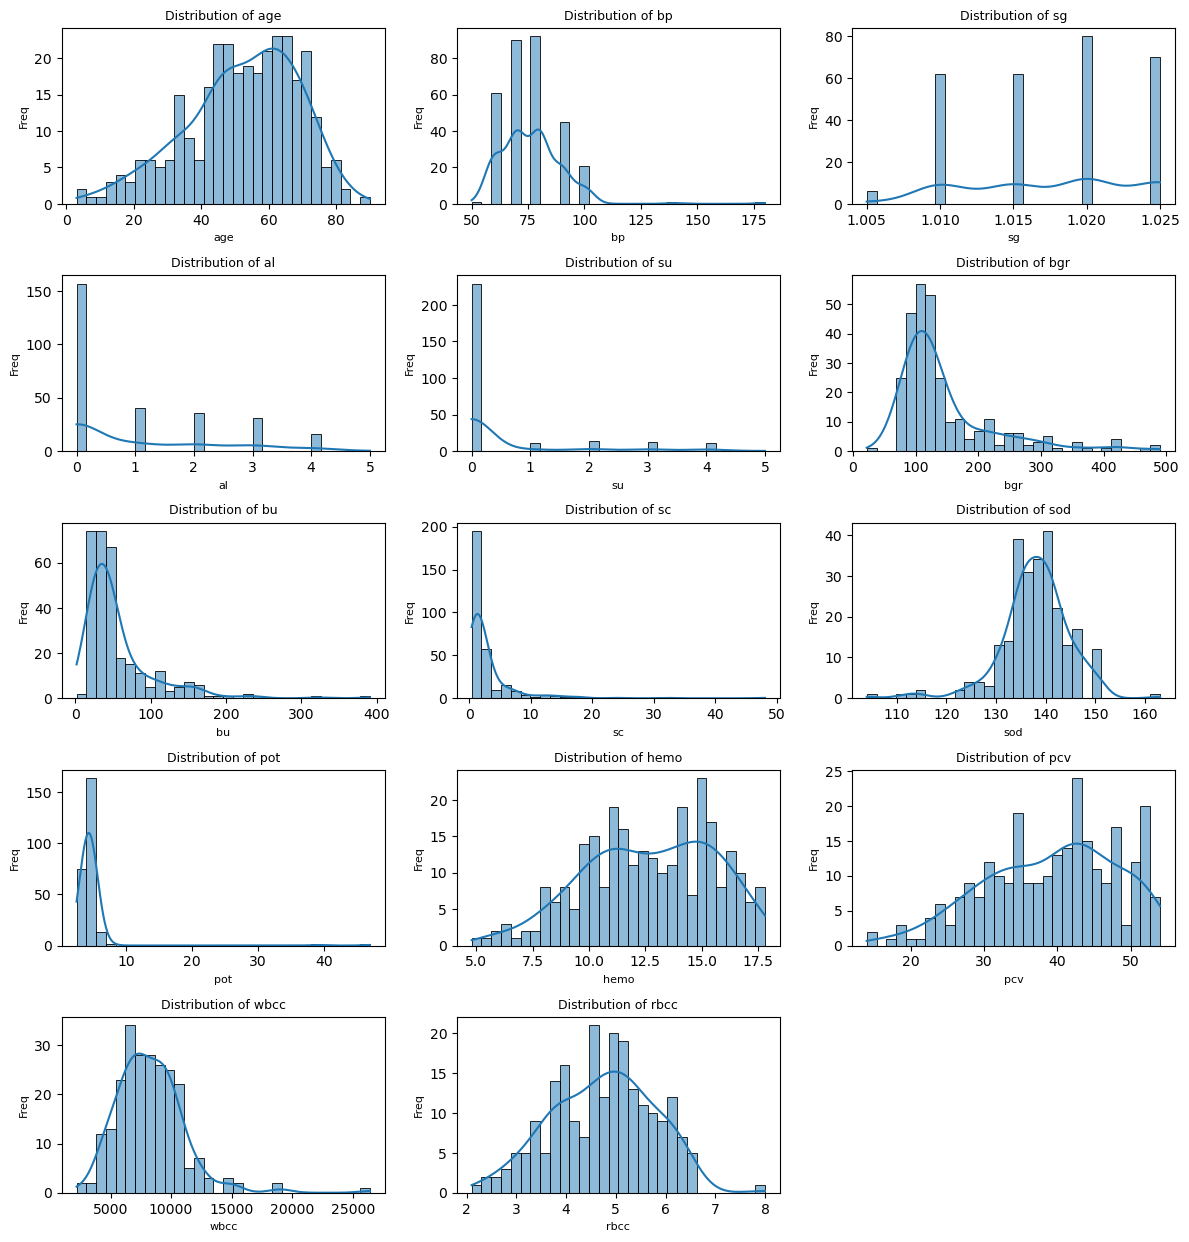

In [274]:
# Plotting numeric fields to check for symmetry/normal distribution and skewness in training set only. All skewed. Median values to be used for imputation of numeric fields.
numeric_cols = ["age", "bp", "sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wbcc", "rbcc"]

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 2.5))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df_ckd_train[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=9)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel("Freq", fontsize=8)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=1.0)
plt.show()

In [275]:
#🔍 Exploratory Data Analysis

Correlation between rbcc and hemo: 0.782281851972027


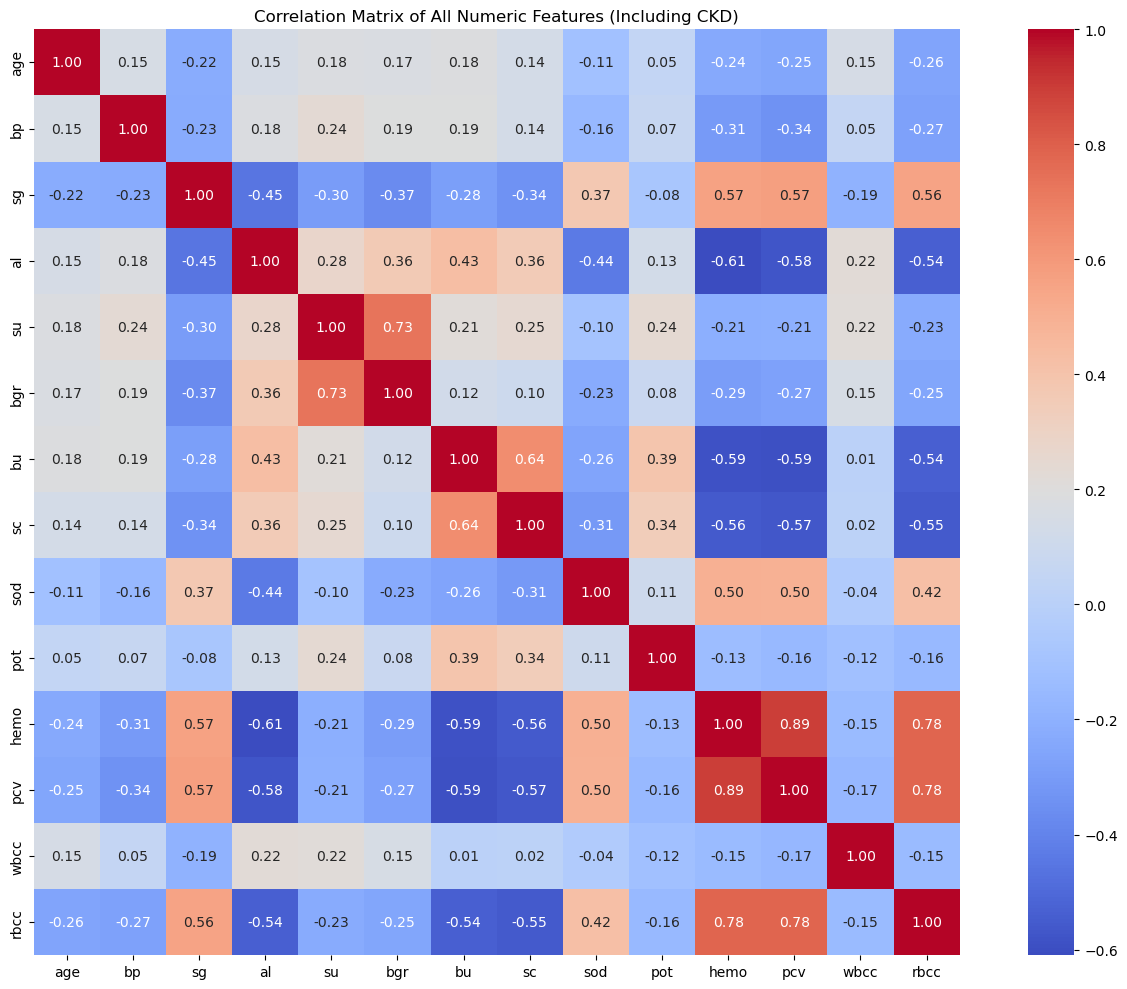

In [276]:
# Correlation matrix shows high correlation between hemo, rbcc, and pcv; evidence of multicollinearity.

# Select numeric columns only
numeric_df = df_ckd_train.select_dtypes(include='number')

# Compute full correlation matrix
corr_matrix = numeric_df.corr()

# Optional: Print correlation between rbcc and hemo
print("Correlation between rbcc and hemo:", corr_matrix.loc["rbcc", "hemo"])

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of All Numeric Features (Including CKD)")
plt.tight_layout()
plt.show()

In [277]:
# Exploring and calculating outliers

# Select numeric columns only
numeric_df = df_ckd_train.select_dtypes(include='number')

# Calculate outliers

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))
outlier_counts = outliers.sum()

print("Outlier counts per column:\n", outlier_counts[outlier_counts > 0])

Outlier counts per column:
 age      3
bp      24
sg       6
su      49
bgr     34
bu      31
sc      40
sod     10
pot      4
wbcc     8
rbcc     1
dtype: int64


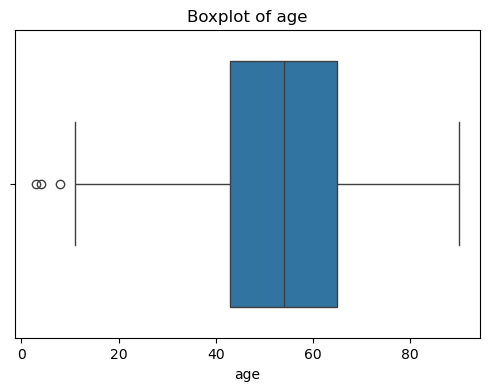

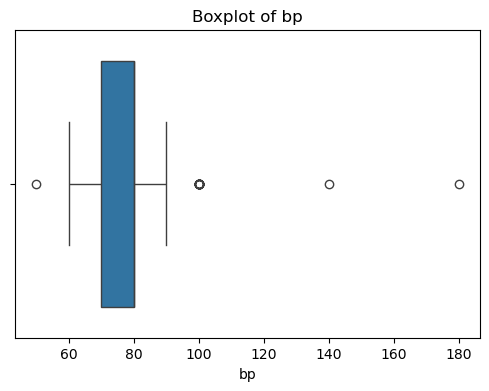

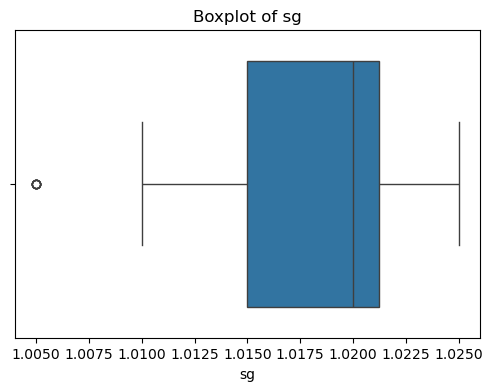

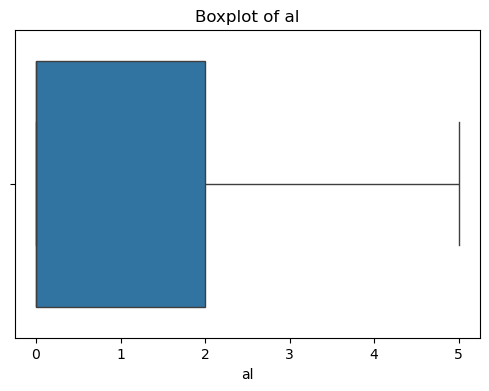

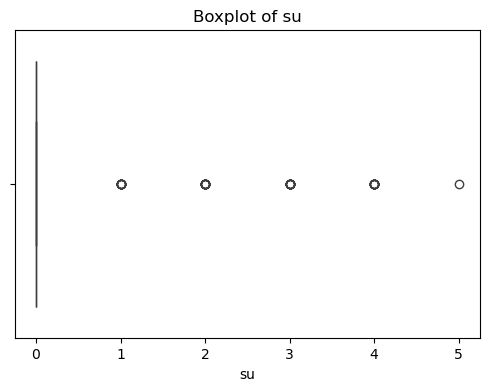

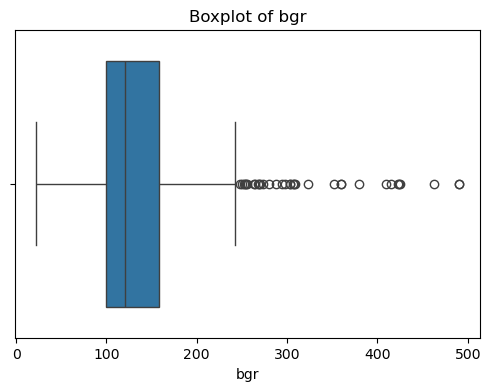

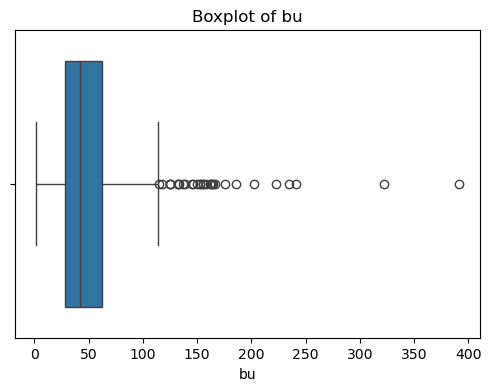

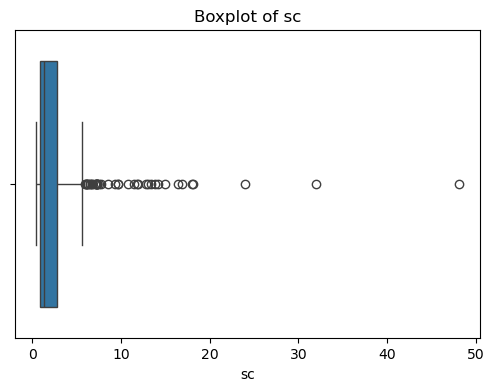

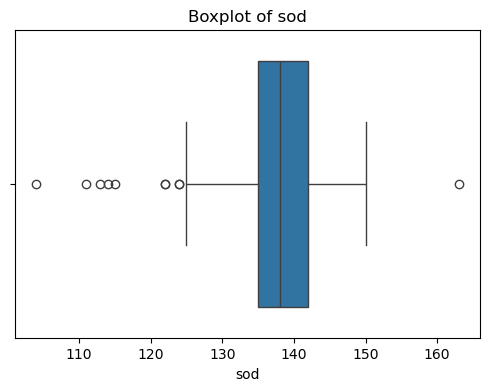

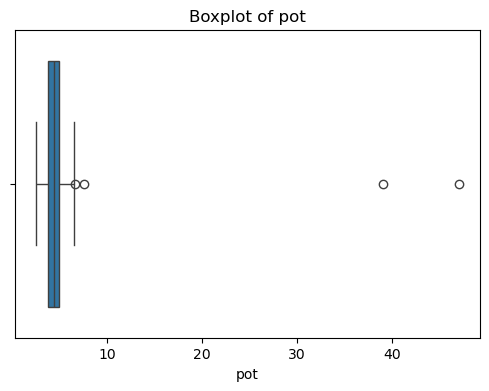

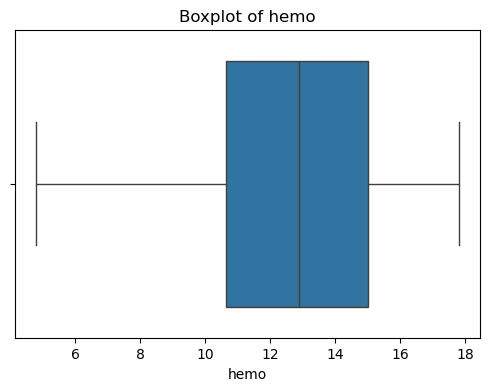

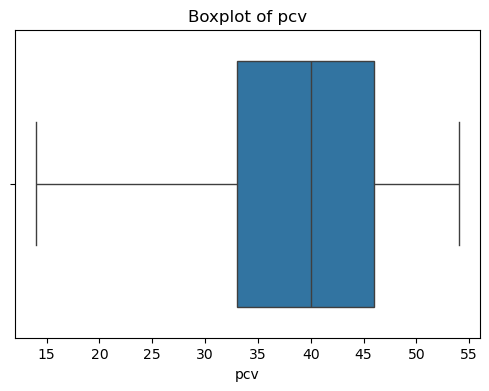

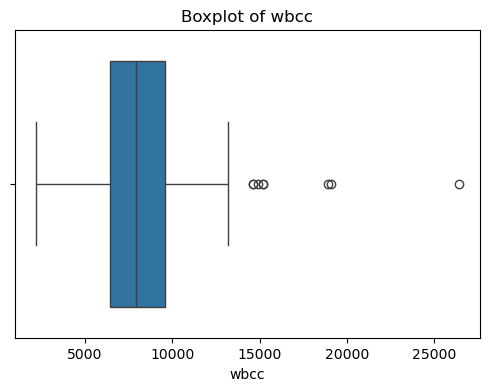

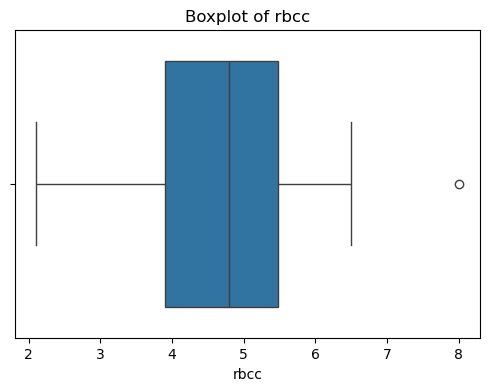

In [278]:
# Plotting to check for outliers
numeric_cols = df_ckd_train.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_ckd_train[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [279]:
#🧹 Data Wrangling

In [280]:
# Dropping columns before wrangling data: rbcc, rbc, wbcc, and pcv
df_ckd_train = df_ckd_train.drop(['rbcc', 'rbc', 'wbcc', 'pcv'], axis=1)

In [281]:
# Verifying that the fields were dropped
df_ckd_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 380 to 60
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     313 non-null    float64
 1   bp      312 non-null    float64
 2   sg      280 non-null    float64
 3   al      281 non-null    float64
 4   su      278 non-null    float64
 5   pc      267 non-null    object 
 6   pcc     316 non-null    object 
 7   ba      316 non-null    object 
 8   bgr     288 non-null    float64
 9   bu      307 non-null    float64
 10  sc      308 non-null    float64
 11  sod     255 non-null    float64
 12  pot     255 non-null    float64
 13  hemo    279 non-null    float64
 14  htn     320 non-null    object 
 15  dm      320 non-null    object 
 16  cad     320 non-null    object 
 17  appet   319 non-null    object 
 18  pe      319 non-null    object 
 19  ane     319 non-null    object 
 20  class   320 non-null    object 
dtypes: float64(11), object(10)
memory usage: 55

In [282]:
# Trim leading or trailing spaces from all string (object) columns in df_ckd_train
df_ckd_train = df_ckd_train.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [283]:
# Replacing all '?' values with 'NaN' instead
df_ckd_train.replace("?", np.nan, inplace = True)

In [284]:
# Imputing missing values for numeric fields with median
df_ckd_train['age'] = df_ckd_train.age.fillna(df_ckd.age.median())
df_ckd_train['bp'] = df_ckd_train.bp.fillna(df_ckd.bp.median())
df_ckd_train['sg'] = df_ckd_train.sg.fillna(df_ckd.sg.median())
df_ckd_train['al'] = df_ckd_train.al.fillna(df_ckd.al.median())
df_ckd_train['su'] = df_ckd_train.su.fillna(df_ckd.su.median())
df_ckd_train['bgr'] = df_ckd_train.bgr.fillna(df_ckd.bgr.median())
df_ckd_train['bu'] = df_ckd_train.bu.fillna(df_ckd.bu.median())
df_ckd_train['sc'] = df_ckd_train.sc.fillna(df_ckd.sc.median())
df_ckd_train['sod'] = df_ckd_train.sod.fillna(df_ckd.sod.median())
df_ckd_train['pot'] = df_ckd_train.pot.fillna(df_ckd.pot.median())
df_ckd_train['hemo'] = df_ckd_train.hemo.fillna(df_ckd.hemo.median())

In [285]:
# Verifying numeric fields no longer have missing values
df_ckd_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 380 to 60
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     320 non-null    float64
 1   bp      320 non-null    float64
 2   sg      320 non-null    float64
 3   al      320 non-null    float64
 4   su      320 non-null    float64
 5   pc      267 non-null    object 
 6   pcc     316 non-null    object 
 7   ba      316 non-null    object 
 8   bgr     320 non-null    float64
 9   bu      320 non-null    float64
 10  sc      320 non-null    float64
 11  sod     320 non-null    float64
 12  pot     320 non-null    float64
 13  hemo    320 non-null    float64
 14  htn     320 non-null    object 
 15  dm      320 non-null    object 
 16  cad     320 non-null    object 
 17  appet   319 non-null    object 
 18  pe      319 non-null    object 
 19  ane     319 non-null    object 
 20  class   320 non-null    object 
dtypes: float64(11), object(10)
memory usage: 55

In [286]:
# Recoding Boolean text values to True/False
df_ckd_train['pc'] = df_ckd_train['pc'].map({'normal': False, 'abnormal': True})
df_ckd_train['pcc'] = df_ckd_train['pcc'].map({'notpresent': False, 'present': True})
df_ckd_train['ba'] = df_ckd_train['ba'].map({'notpresent': False, 'present': True})
df_ckd_train['htn'] = df_ckd_train['htn'].map({'no': False, 'yes': True})
df_ckd_train['dm'] = df_ckd_train['dm'].map({'no': False, 'yes': True})
df_ckd_train['cad'] = df_ckd_train['cad'].map({'no': False, 'yes': True})
df_ckd_train['appet'] = df_ckd_train['appet'].map({'good': False, 'poor': True})
df_ckd_train['pe'] = df_ckd_train['pe'].map({'no': False, 'yes': True})

In [287]:
# Imputing missing values for Boolean fields using mode or most frequent value
fields_to_impute = ['pc', 'pcc', 'ba', 'appet', 'pe', 'ane']

for col in fields_to_impute:
    mode_value = df_ckd_train[col].mode()[0]
    df_ckd_train[col] = df_ckd_train[col].fillna(mode_value)

C:\Users\winni\AppData\Local\Temp\ipykernel_84636\3080764829.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ckd_train[col] = df_ckd_train[col].fillna(mode_value)


In [288]:
# Verifying: No more missing values!
df_ckd_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 380 to 60
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     320 non-null    float64
 1   bp      320 non-null    float64
 2   sg      320 non-null    float64
 3   al      320 non-null    float64
 4   su      320 non-null    float64
 5   pc      320 non-null    bool   
 6   pcc     320 non-null    bool   
 7   ba      320 non-null    bool   
 8   bgr     320 non-null    float64
 9   bu      320 non-null    float64
 10  sc      320 non-null    float64
 11  sod     320 non-null    float64
 12  pot     320 non-null    float64
 13  hemo    320 non-null    float64
 14  htn     320 non-null    bool   
 15  dm      320 non-null    bool   
 16  cad     320 non-null    bool   
 17  appet   320 non-null    bool   
 18  pe      320 non-null    bool   
 19  ane     320 non-null    object 
 20  class   320 non-null    object 
dtypes: bool(8), float64(11), object(2)
memory u

In [289]:
# Changing data types
df_ckd_train['class'] = df_ckd_train['class'].astype(bool)

In [290]:
# Verifying: Data types are all correct!
df_ckd_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 380 to 60
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     320 non-null    float64
 1   bp      320 non-null    float64
 2   sg      320 non-null    float64
 3   al      320 non-null    float64
 4   su      320 non-null    float64
 5   pc      320 non-null    bool   
 6   pcc     320 non-null    bool   
 7   ba      320 non-null    bool   
 8   bgr     320 non-null    float64
 9   bu      320 non-null    float64
 10  sc      320 non-null    float64
 11  sod     320 non-null    float64
 12  pot     320 non-null    float64
 13  hemo    320 non-null    float64
 14  htn     320 non-null    bool   
 15  dm      320 non-null    bool   
 16  cad     320 non-null    bool   
 17  appet   320 non-null    bool   
 18  pe      320 non-null    bool   
 19  ane     320 non-null    object 
 20  class   320 non-null    bool   
dtypes: bool(9), float64(11), object(1)
memory u

In [291]:
df_ckd_train.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,52.275000,76.500000,1.017906,0.856250,0.387500,143.946875,55.519375,2.856719,137.928125,4.619063,12.659531
std,16.329081,13.353172,0.005442,1.263656,1.013931,75.482525,47.059487,4.481842,6.153559,3.132214,2.684139
min,3.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,104.000000,2.500000,4.800000
25%,43.000000,70.000000,1.015000,0.000000,0.000000,100.000000,28.000000,1.000000,135.000000,4.000000,10.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,65.000000,80.000000,1.020000,2.000000,0.000000,145.000000,60.000000,2.725000,141.000000,4.800000,14.900000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,48.100000,163.000000,47.000000,17.800000


In [292]:
# Create df_ckd_test from split
df_ckd_test = pd.concat([X_test, y_test], axis=1)

In [293]:
# Create df_ckd_test from split
df_ckd_test = pd.concat([X_test, y_test], axis=1)

# 2Function to clean only the test set using train medians/modes
def clean_ckd_test(df_test, df_train):
    # Drop unused columns
    df_test = df_test.drop(['rbcc', 'rbc', 'wbcc', 'pcv'], axis=1, errors='ignore')

    # Trim spaces
    df_test = df_test.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

    # Replace '?' with NaN
    df_test.replace("?", np.nan, inplace=True)

    # Fill numeric columns using TRAIN medians
    numeric_fields = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']
    for col in numeric_fields:
        if col in df_test.columns:
            df_test[col] = df_test[col].fillna(df_train[col].median())

    # Map categories to booleans
    mappings = {
        'pc': {'normal': False, 'abnormal': True},
        'pcc': {'notpresent': False, 'present': True},
        'ba': {'notpresent': False, 'present': True},
        'htn': {'no': False, 'yes': True},
        'dm': {'no': False, 'yes': True},
        'cad': {'no': False, 'yes': True},
        'appet': {'good': False, 'poor': True},
        'pe': {'no': False, 'yes': True},
        'ane': {'no': False, 'yes': True}
    }
    for col, mapping in mappings.items():
        if col in df_test.columns:
            df_test[col] = df_test[col].map(mapping)

    # Fill boolean fields using TRAIN modes
    fields_to_impute = ['pc', 'pcc', 'ba', 'appet', 'pe', 'ane']
    for col in fields_to_impute:
        if col in df_test.columns:
            mode_value = df_train[col].mode()[0]
            df_test[col] = df_test[col].fillna(mode_value)

    # Ensure class is boolean if present
    if 'class' in df_test.columns:
        df_test['class'] = df_test['class'].astype(bool)

    return df_test

# Apply to the test set
df_ckd_test = clean_ckd_test(df_ckd_test, df_ckd_train)

C:\Users\winni\AppData\Local\Temp\ipykernel_84636\2685470609.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test[col] = df_test[col].fillna(mode_value)


In [294]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [295]:
# Combine X and y into train/test dataframes
df_ckd_train = pd.concat([X_train, y_train], axis=1)
df_ckd_test = pd.concat([X_test, y_test], axis=1)


In [296]:
def clean_ckd(df):
    df = df.copy()

    # Drop unused or sparse columns
    df = df.drop(['rbc', 'wbcc', 'pcv'], axis=1, errors='ignore')

    # Strip whitespace
    df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

    # Replace '?' with np.nan
    df.replace('?', np.nan, inplace=True)

    # Convert numeric columns
    numeric_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            df[col] = df[col].fillna(df[col].median())

    # Map categoricals to bool
    mappings = {
        'pc':  {'normal': False, 'abnormal': True},
        'pcc': {'notpresent': False, 'present': True},
        'ba':  {'notpresent': False, 'present': True},
        'htn': {'no': False, 'yes': True},
        'dm':  {'no': False, 'yes': True},
        'cad': {'no': False, 'yes': True},
        'appet': {'good': False, 'poor': True},
        'ane': {'no': False, 'yes': True},
        'pe': {'no': False, 'yes': True}
    }

    for col, mapping in mappings.items():
        if col in df.columns:
            df[col] = df[col].map(mapping)

    # Fill missing booleans with mode
    fill_with_mode = ['pc', 'pcc', 'ba', 'appet', 'ane', 'pe']
    for col in fill_with_mode:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mode()[0])

    # Convert target to int (0 or 1)
    if 'class' in df.columns:
        df['class'] = df['class'].map({'notckd': 0, 'ckd': 1}).astype(int)

    return df


In [297]:
df_ckd_train = clean_ckd(df_ckd_train)
df_ckd_test = clean_ckd(df_ckd_test)


C:\Users\winni\AppData\Local\Temp\ipykernel_84636\1676980302.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])
C:\Users\winni\AppData\Local\Temp\ipykernel_84636\1676980302.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [298]:
X_train = df_ckd_train.drop('class', axis=1)
y_train = df_ckd_train['class']

X_test = df_ckd_test.drop('class', axis=1)
y_test = df_ckd_test['class']


In [299]:
# Check for NaNs
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())


Missing values in X_train: 102
Missing values in X_test: 35


In [300]:
# Fill any remaining NaNs with column medians (safe for numeric features)
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())


In [301]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.96      0.98      0.97        50

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



In [302]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree:\n", classification_report(y_test, y_pred_tree))


Decision Tree:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.98      1.00      0.99        50

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [303]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

print("Random Forest:\n", classification_report(y_test, y_pred_forest))


Random Forest:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       0.96      1.00      0.98        50

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



In [304]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)

# Convert to binary
y_pred_lin_binary = (y_pred_lin >= 0.5).astype(int)

print("Linear Regression as classifier:\n", classification_report(y_test, y_pred_lin_binary))


Linear Regression as classifier:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.96      0.98        50

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



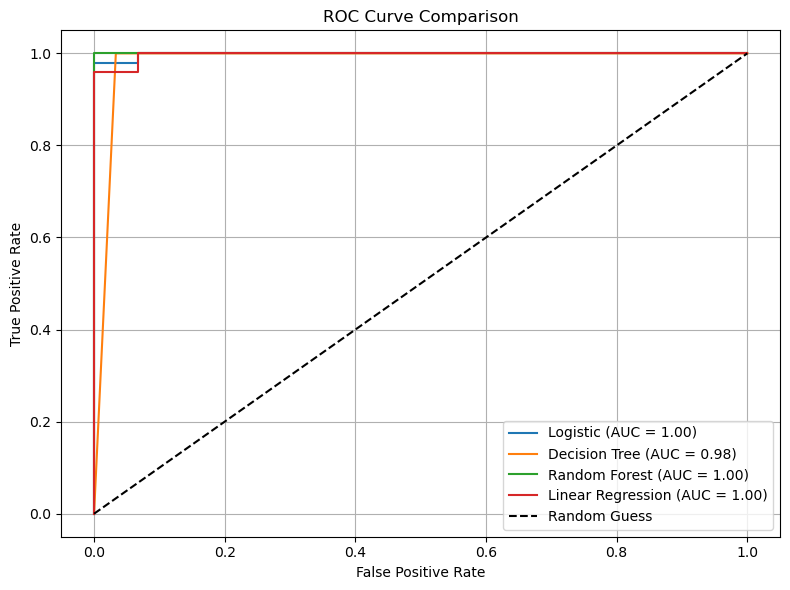

In [305]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilities or continuous scores
y_proba_log = logreg.predict_proba(X_test)[:, 1]
y_proba_tree = tree.predict_proba(X_test)[:, 1]
y_proba_forest = forest.predict_proba(X_test)[:, 1]
y_score_lin = linreg.predict(X_test)  # Already continuous

# Compute FPR, TPR for each model
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_proba_forest)
fpr_lin, tpr_lin, _ = roc_curve(y_test, y_score_lin)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC = {roc_auc_score(y_test, y_proba_log):.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_proba_tree):.2f})")
plt.plot(fpr_forest, tpr_forest, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_proba_forest):.2f})")
plt.plot(fpr_lin, tpr_lin, label=f"Linear Regression (AUC = {roc_auc_score(y_test, y_score_lin):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Labels and legend
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [306]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Collect predictions & probabilities
predictions = {
    'Logistic Regression': (logreg.predict(X_test), logreg.predict_proba(X_test)[:, 1]),
    'Decision Tree': (tree.predict(X_test), tree.predict_proba(X_test)[:, 1]),
    'Random Forest': (forest.predict(X_test), forest.predict_proba(X_test)[:, 1]),
    'Linear Regression': ((y_pred_lin >= 0.5).astype(int), y_pred_lin)
}

# Build table
results = []
for model_name, (y_pred, y_score) in predictions.items():
    results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_score)
    })

# Display table
summary_df = pd.DataFrame(results)
print(summary_df)


                 Model  Accuracy  Precision  Recall  F1 Score       AUC
0  Logistic Regression    0.9625   0.960784    0.98  0.970297  0.998667
1        Decision Tree    0.9875   0.980392    1.00  0.990099  0.983333
2        Random Forest    0.9750   0.961538    1.00  0.980392  1.000000
3    Linear Regression    0.9750   1.000000    0.96  0.979592  0.997333


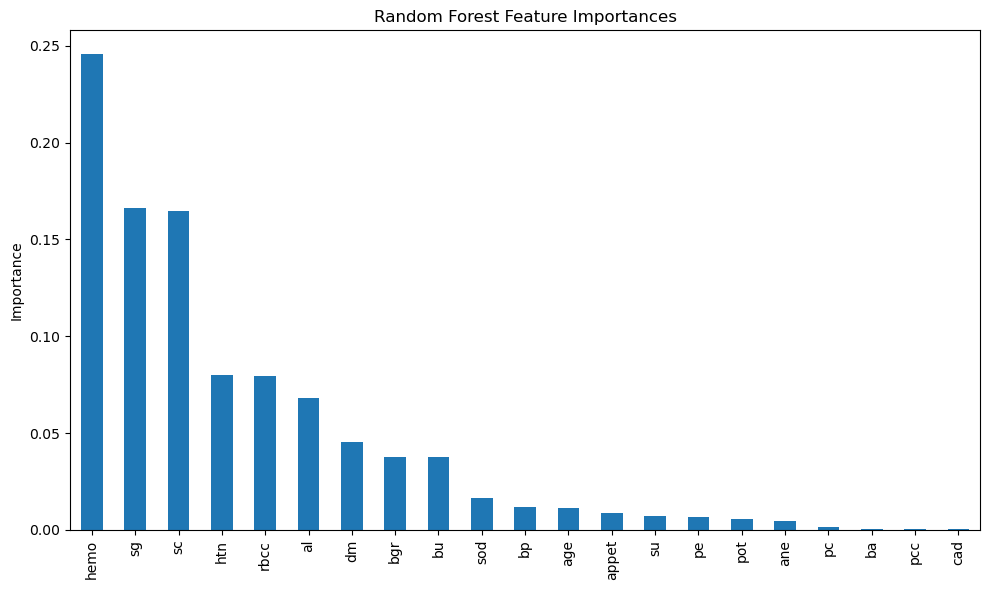

In [307]:
import matplotlib.pyplot as plt

# For Random Forest
importances = forest.feature_importances_
feature_names = X_train.columns

forest_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
forest_imp.plot(kind='bar')
plt.title("Random Forest Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


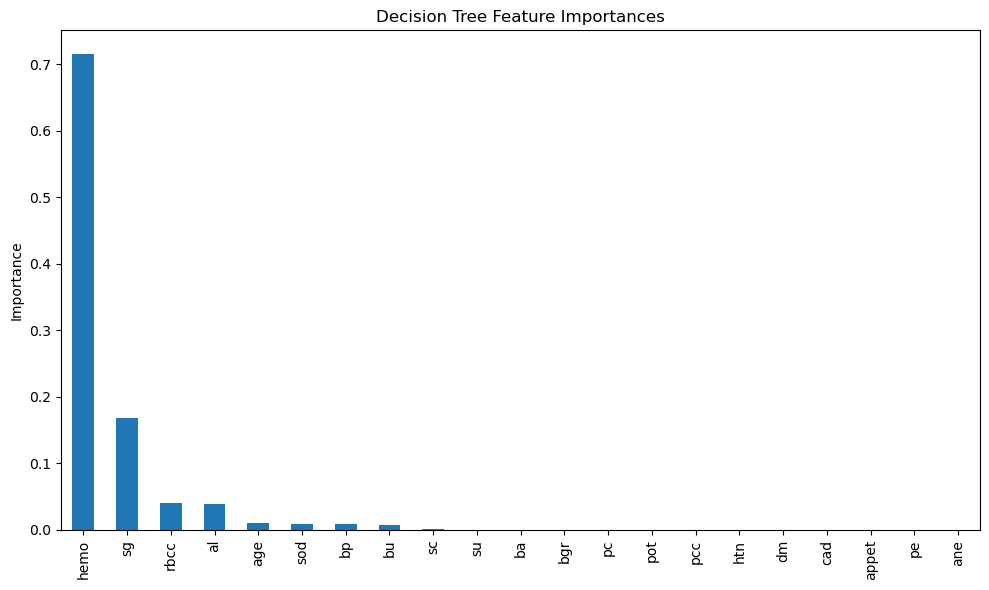

In [308]:
import matplotlib.pyplot as plt

# For Decision Tree
importances = tree.feature_importances_
feature_names = X_train.columns

forest_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
forest_imp.plot(kind='bar')
plt.title("Decision Tree Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


In [309]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Accuracy:", grid.best_score_)

# Use best model to predict test set
best_forest = grid.best_estimator_
y_pred_best = best_forest.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validated Accuracy: 0.99375
Test Accuracy: 0.9875


In [313]:
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone
from sklearn.metrics import roc_auc_score
import pandas as pd

# Use your clean training data
X_clean = X_train.copy()
y_clean = y_train.copy()

# Fit baseline model
model = LogisticRegression(max_iter=1000)
model.fit(X_clean, y_clean)
base_auc = roc_auc_score(y_clean, model.predict_proba(X_clean)[:, 1])

# Feature ablation loop
ablation_results = []
for feature in X_clean.columns:
    X_dropped = X_clean.drop(columns=[feature])
    try:
        model_ = clone(model)
        model_.fit(X_dropped, y_clean)
        auc = roc_auc_score(y_clean, model_.predict_proba(X_dropped)[:, 1])
        ablation_results.append((feature, auc, base_auc - auc))
    except Exception as e:
        ablation_results.append((feature, None, None))
        print(f"Failed on feature '{feature}': {e}")

# Create and display results table
ablation_df = pd.DataFrame(ablation_results, columns=['Dropped Feature', 'AUC After Drop', 'AUC Drop'])
ablation_df = ablation_df.sort_values(by='AUC Drop', ascending=False).reset_index(drop=True)

# Show top 10
ablation_df.head(10)


C:\Users\winni\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Dropped Feature,AUC After Drop,AUC Drop
0,sc,0.997250,0.002125
1,hemo,0.997375,0.002000
2,al,0.997833,0.001542
3,su,0.999167,0.000208
4,bp,0.999167,0.000208
5,htn,0.999167,0.000208
6,dm,0.999250,0.000125
7,bu,0.999250,0.000125
8,rbcc,0.999292,0.000083
9,age,0.999333,0.000042


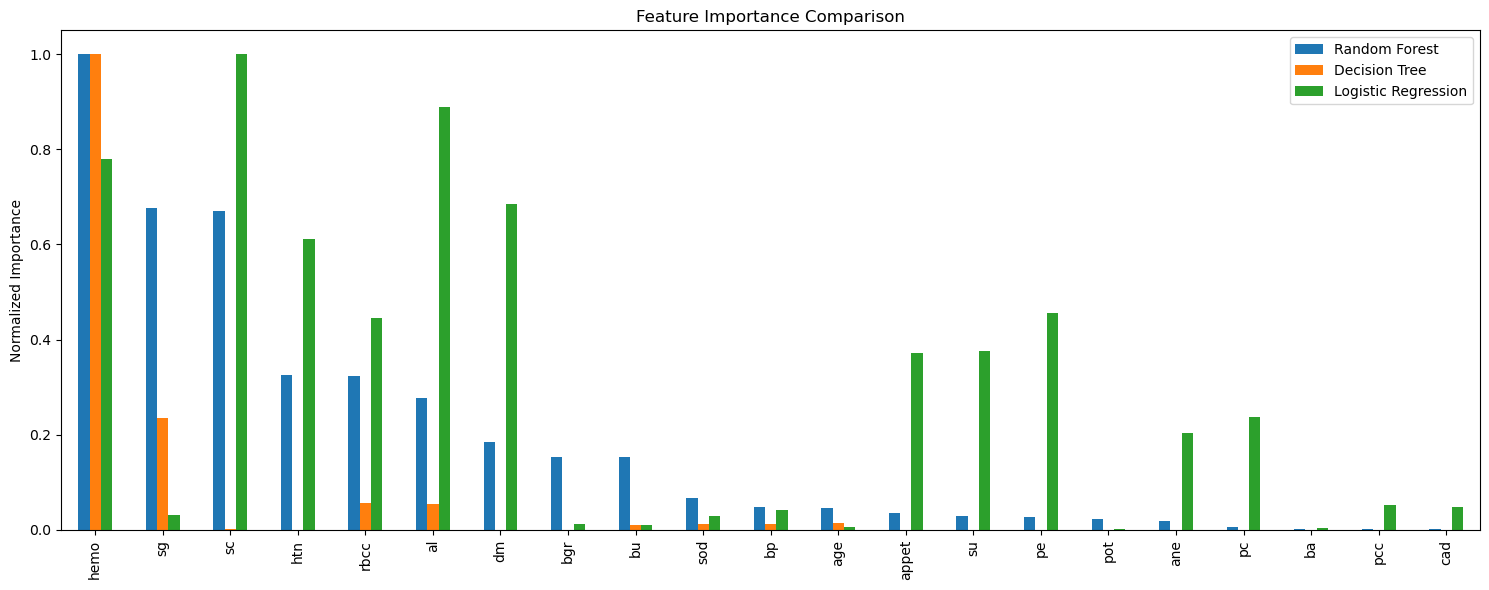

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get feature names
feature_names = X_train.columns

# 1. Random Forest Feature Importances
rf_importances = pd.Series(forest.feature_importances_, index=feature_names)

# 2. Decision Tree Feature Importances
dt_importances = pd.Series(tree.feature_importances_, index=feature_names)

# 3. Logistic Regression (absolute value of coefficients)
logreg_importances = pd.Series(np.abs(logreg.coef_[0]), index=feature_names)

# Combine into one DataFrame
importance_df = pd.DataFrame({
    'Random Forest': rf_importances,
    'Decision Tree': dt_importances,
    'Logistic Regression': logreg_importances
})

# Optional: Normalize for comparison
importance_df = importance_df.div(importance_df.max())

# Plot
importance_df.sort_values(by='Random Forest', ascending=False).plot(kind='bar', figsize=(15,6))
plt.title('Feature Importance Comparison')
plt.ylabel('Normalized Importance')
plt.tight_layout()
plt.show()


In [323]:
# Sort by Random Forest importance and display full table
pd.set_option('display.max_rows', None)  # optional: show all rows
importance_df.sort_values(by='Random Forest', ascending=False)


,Random Forest,Decision Tree,Logistic Regression
hemo,1.000000,1.000000,0.779803
sg,0.677117,0.235290,0.031943
sc,0.671223,0.000932,1.000000
htn,0.325708,0.000000,0.611813
rbcc,0.324446,0.056488,0.445445
al,0.277989,0.054488,0.887985
dm,0.184468,0.000000,0.684585
bgr,0.153087,0.000000,0.011443
bu,0.152490,0.011088,0.009750
sod,0.066515,0.012427,0.028920
